In [1]:
import pandas as pd

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option("max_colwidth", 200)

import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import os.path
import fuzzywuzzy as fz
import googletrans as gtr
import translate as tr
import langdetect as ld
os.getcwd()

'C:\\Users\\ykele'

In [2]:
# df3 = pd.read_csv('en_openfoodfacts_org_products_V3.csv',encoding ='utf-8')

df6 = pd.read_csv('en_openfoodfacts_org_products_V6.csv')


C:\Users\ykele\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df6.head()

,Unnamed: 0,Ancien_Index,code,url,product_name,product_brand,generic_name,quantity,brands,categories,manufacturing_places,labels,emb_codes,purchase_places,stores,countries,ingredients_text,allergens,traces_tags,serving_size,nutriscore_score,nutriscore_grade,pnns_groups_1,pnns_groups_2,states,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,image_url,image_ingredients_url,image_nutrition_url,nutrition_score_fr_100g,energy-kcal_100g,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,sodium_100g,fiber_100g,vitamin_a_100g,vitamin_c_100g,potassium_100g,calcium_100g,polyunsaturated_fat_100g,vitamin_e_100g,vitamin_b1_100g,vitamin_b2_100g,vitamin_b6_100g,vitamin_b12_100g,magnesium_100g
0,0,5,0000000000100,http://world-en.openfoodfacts.org/product/0000000000100/moutarde-au-mout-de-raisin-courte-paille,moutarde au moût de raisin,"moutarde au moût de raisin , courte paille",NaN,100g,courte paille,"Epicerie, Condiments, Sauces, Moutardes",NaN,Delois france,NaN,NaN,courte paille,France,eau graines de téguments de moutarde vinaigre de vin rouge sel vin rouge sucre moût de raisin (6.2%) oignons colorants extraits de carotte et extrait de paprika huile de tournesol son de moutard...,en:mustard,NaN,NaN,18.0,d,Fat and sauces,Dressings and sauces,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-completed, en:expiration-date-completed, en:characteristics-to-be-completed, en:packaging-to-be-completed, en:photos-to-be-validate...",NaN,60.0,b,en:mustards,https://static.openfoodfacts.org/images/products/000/000/000/0100/front.3.400.jpg,NaN,NaN,18.0,0.0,936.0,8.2,2.2,29.0,22.0,5.1,1.8400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,24,0000000001199,http://world-en.openfoodfacts.org/product/0000000001199/solene-cereales-poulet-crous,Solène céréales poulet,"Solène céréales poulet, CROUS",NaN,NaN,CROUS,NaN,NaN,NaN,NaN,NaN,NaN,France,"antioxydant : érythorbate de sodium, colorant : caramel - origine UE), tomate 33,3%, MAYONNAISE 11,1% (huile de colza 78,9%, eau, jaunes d'OEUF 6%, vinaigre, MOUTARDE [eau, graines de MOUTARDE, se...","en:eggs,en:mustard",NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:cate...",NaN,NaN,NaN,NaN,https://static.openfoodfacts.org/images/products/000/000/000/1199/front_fr.13.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/1199/ingredients_fr.17.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/1199/nutrition_fr.14.400.jpg,NaN,219.0,916.0,5.9,0.5,30.3,1.7,9.7,0.1856,2.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,25,0000000001281,http://world-en.openfoodfacts.org/product/0000000001281/tarte-noix-de-coco-crous-resto,Tarte noix de coco,"Tarte noix de coco, Crous Resto',Crous",NaN,NaN,"Crous Resto',Crous","Tartes, Tartes sucrées, Tartes à la noix de coco",NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,14.0,d,Sugary snacks,Biscuits and cakes,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-to-be-completed, en:characteristics-to-be-completed, en:cate...",NaN,NaN,NaN,en:coconut-pies,https://static.openfoodfacts.org/images/products/000/000/000/1281/front_fr.11.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/1281/ingredients_fr.7.400.jpg,NaN,14.0,381.0,1594.0,22.0,15.5,27.3,21.9,4.6,0.0400,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,32,0000000001663,http://world-en.openfoodfacts.org/product/0000000001663/creme-dessert-chocolat-ferme-de-la-fremondiere,Crème dessert chocolat,"Crème dessert chocolat, Ferme De La Frémondière",NaN,NaN,Ferme De La Frémondière,NaN,NaN,NaN,NaN,NaN,NaN,France,"Lait entier, sucre, amidon de maïs, cacao, Agar agar.",NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-co

In [4]:
df6.rename(columns={"Unnamed: 0":"Ancien_Index"},inplace=True)


# fin du nettoyage. Début de l'analyse exploratoire. 


In [5]:
df7=df6[['Ancien_Index', 'code','product_name','image_nutrition_url', 'brands','product_brand','categories','countries','nutriscore_score', 'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2',
         'energy-kcal_100g', 'energy_100g','fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'sodium_100g', 'fiber_100g', 
         'vitamin_a_100g', 'vitamin_c_100g','potassium_100g', 'calcium_100g', 'polyunsaturated_fat_100g', 'vitamin_e_100g',
         'vitamin_b1_100g', 'vitamin_b2_100g', 'vitamin_b6_100g', 'vitamin_b12_100g', 
         'magnesium_100g']]

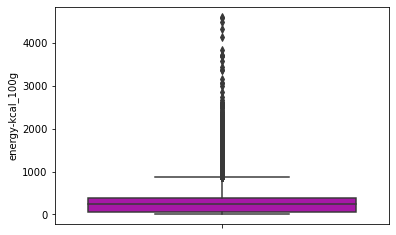

877.0


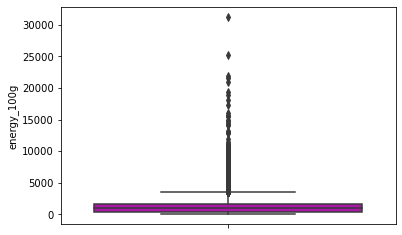

3576.0


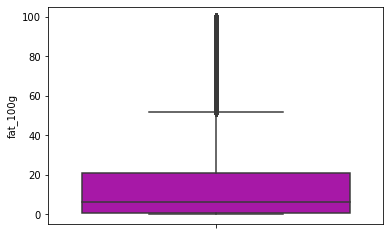

51.75


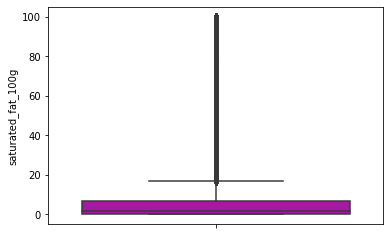

16.735


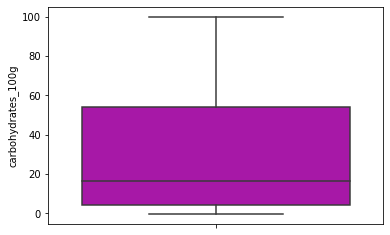

128.8


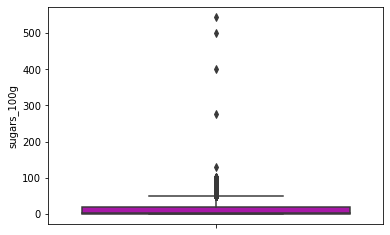

48.8


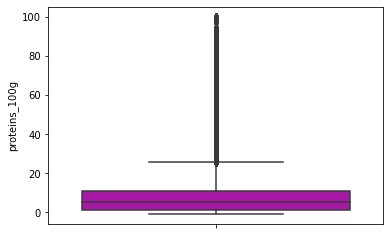

25.84999996423715


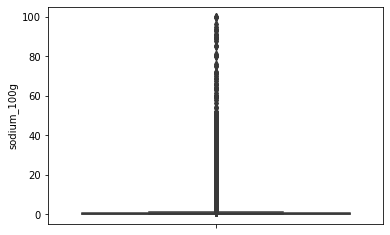

1.2699999523163


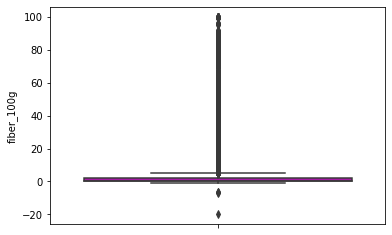

5.0


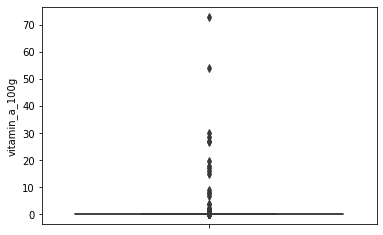

0.0


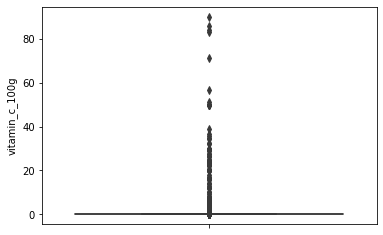

0.0


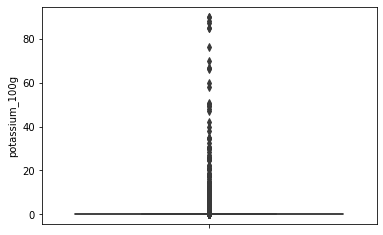

0.0


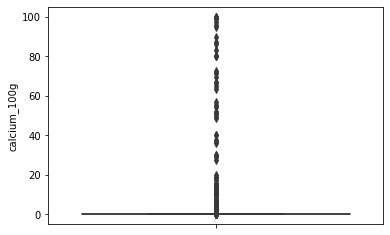

0.0


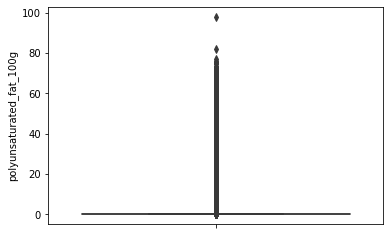

0.0


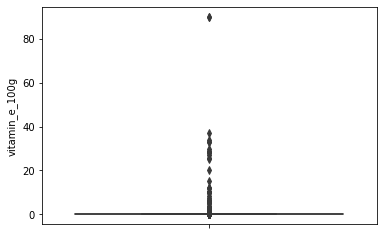

0.0


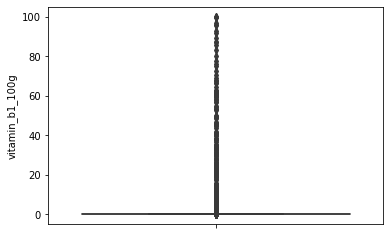

0.0


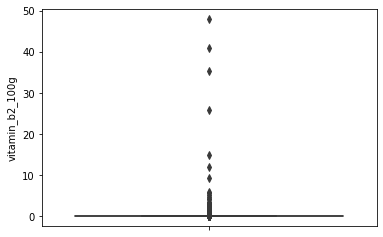

0.0


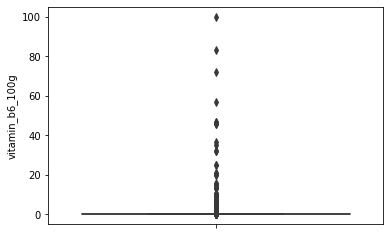

0.0


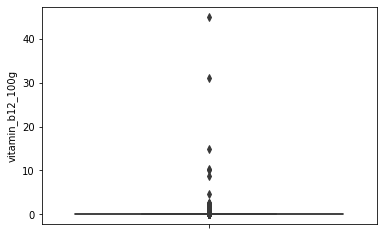

0.0


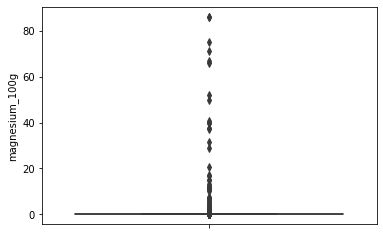

0.0


In [6]:
liste_nutri=['energy-kcal_100g', 'energy_100g','fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'sodium_100g', 'fiber_100g', 
         'vitamin_a_100g', 'vitamin_c_100g','potassium_100g', 'calcium_100g', 'polyunsaturated_fat_100g', 'vitamin_e_100g',
         'vitamin_b1_100g', 'vitamin_b2_100g', 'vitamin_b6_100g', 'vitamin_b12_100g', 
         'magnesium_100g']

for i in liste_nutri:
    sns.boxplot(y=i,palette=["m", "g"],
            data=df7)
    plt.show()
    print(df7[i].describe()[6]+1.5*(df7[i].describe()[6]-df7[i].describe()[4]))

In [7]:
df7=df7[df7['sodium_100g']<50]
df7=df7[df7['sugars_100g']<100]
df7=df7[df7['fiber_100g']>=0]

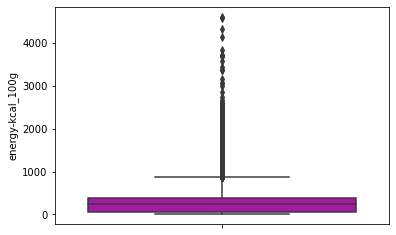

877.75


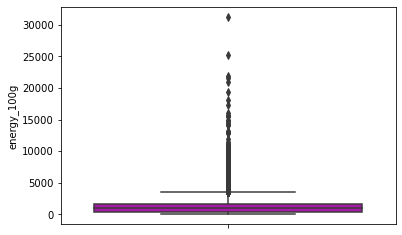

3566.0


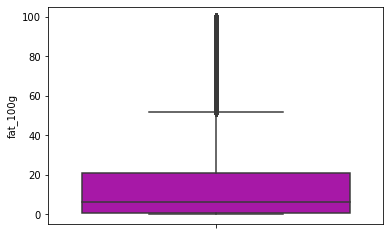

51.599999999999994


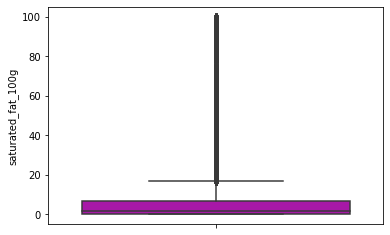

16.845


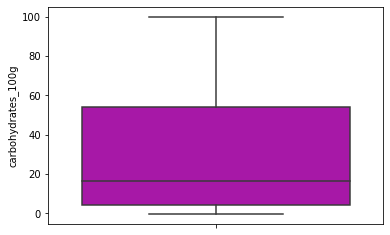

128.55


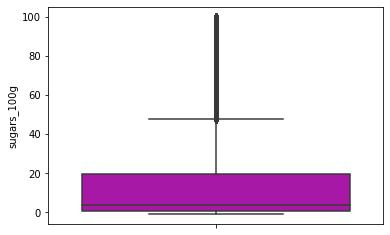

47.800000000000004


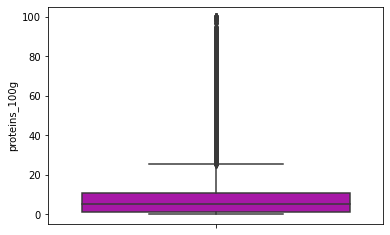

25.73


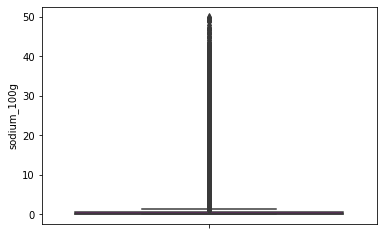

1.27


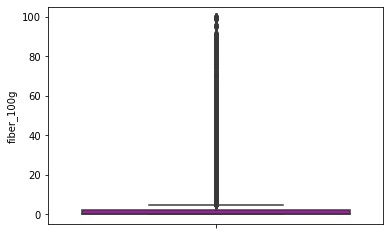

5.0


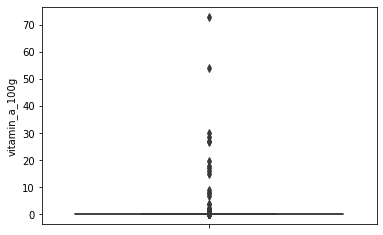

0.0


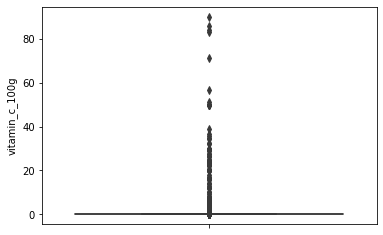

0.0


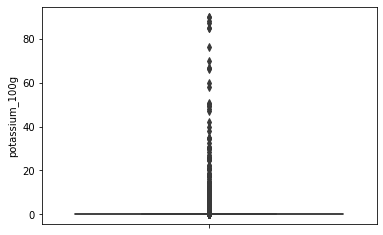

0.0


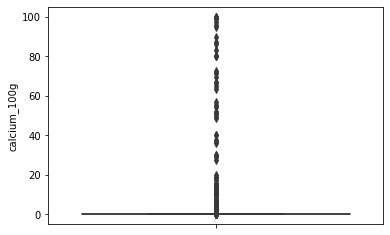

0.0


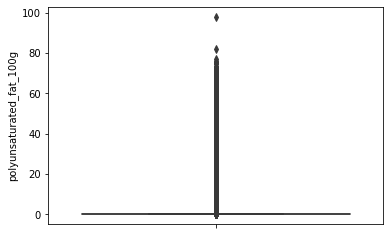

0.0


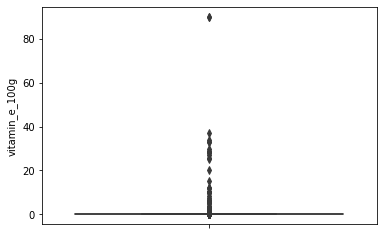

0.0


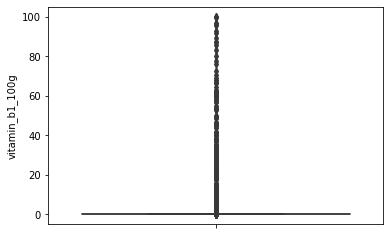

0.0


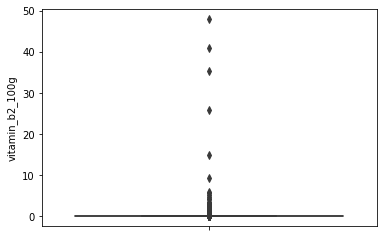

0.0


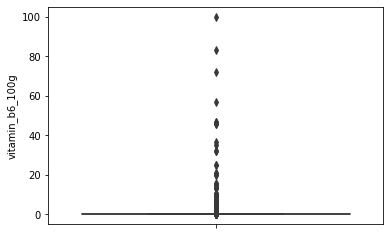

0.0


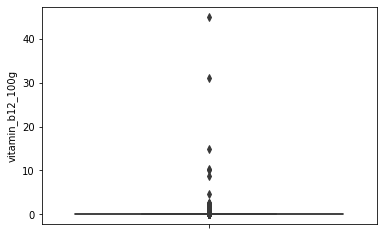

0.0


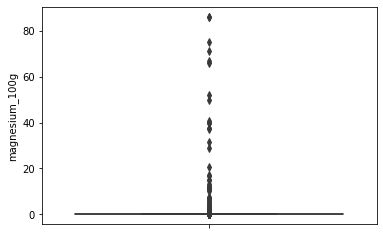

0.0


In [8]:
for i in liste_nutri:
    sns.boxplot(y=i,palette=["m", "g"],
            data=df7)
    plt.show()
    print(df7[i].describe()[6]+1.5*(df7[i].describe()[6]-df7[i].describe()[4]))

# début des analyses bivariées :

## Matrice de corrélation

<AxesSubplot:>

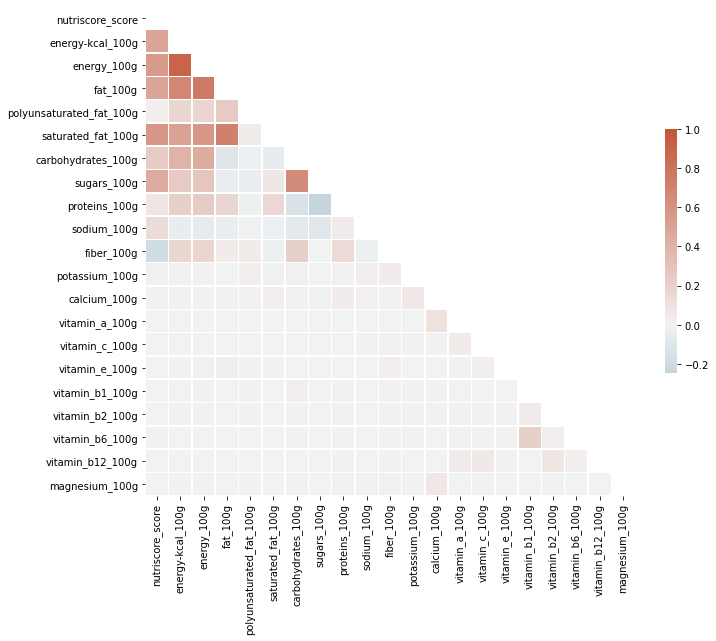

In [9]:
df10=df7[['code', 'product_name', 'image_nutrition_url', 'brands', 'product_brand', 'categories', 'countries', 'nutriscore_score',
          'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2', 'energy-kcal_100g', 'energy_100g', 'fat_100g', 'polyunsaturated_fat_100g' ,'saturated_fat_100g', 
          'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'sodium_100g', 'fiber_100g',
          'potassium_100g', 'calcium_100g','vitamin_a_100g', 'vitamin_c_100g', 'vitamin_e_100g',
         'vitamin_b1_100g', 'vitamin_b2_100g', 'vitamin_b6_100g', 'vitamin_b12_100g', 
         'magnesium_100g']]


corr_df10 = df10.corr()

corr_df10


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_df10, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df10, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
# ce que l'on garde pour le nutriscore :

list_20=['energy_100g',
'fat_100g','saturated_fat_100g', 'carbohydrates_100g',
'sugars_100g', 'sodium_100g', 'fiber_100g'] 

In [11]:
# Boxplots en fonction de nutriscore grade



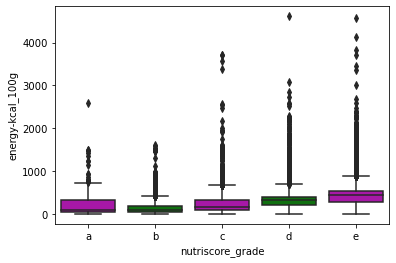

877.75


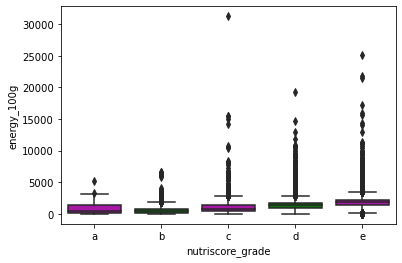

3566.0


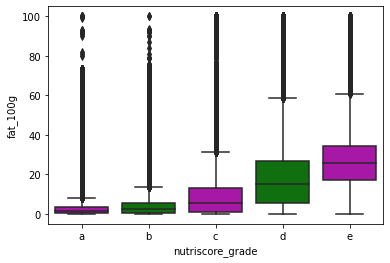

51.599999999999994


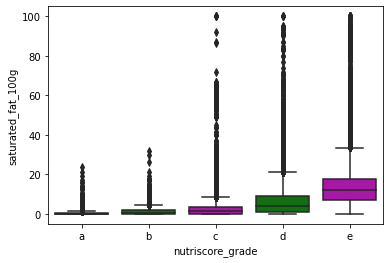

16.845


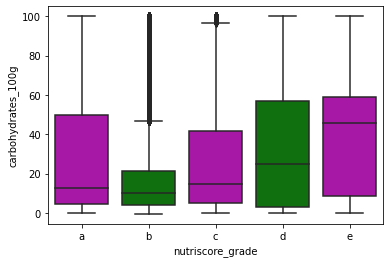

128.55


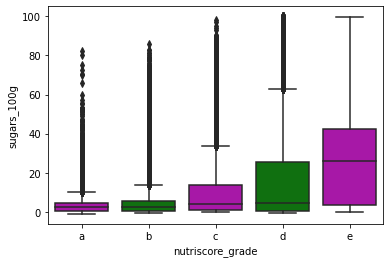

47.800000000000004


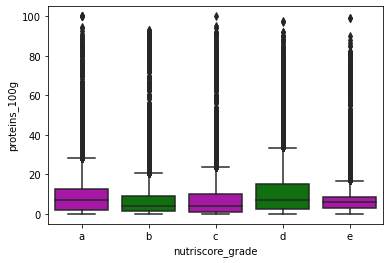

25.73


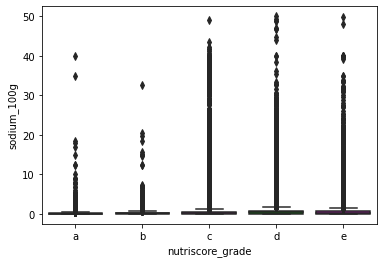

1.27


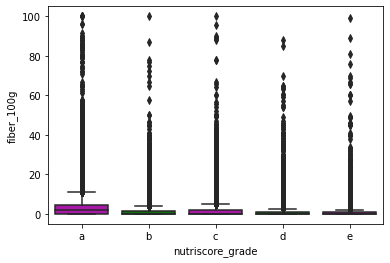

5.0


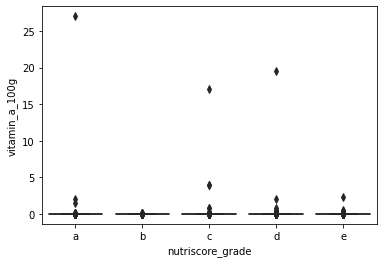

0.0


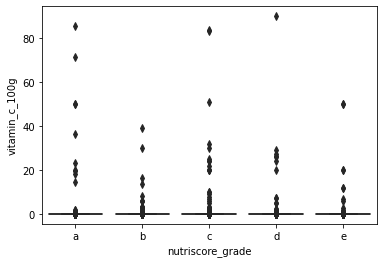

0.0


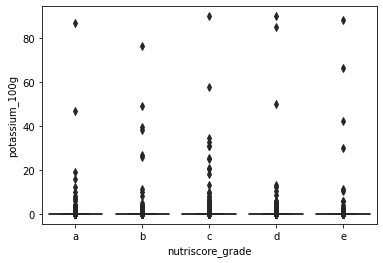

0.0


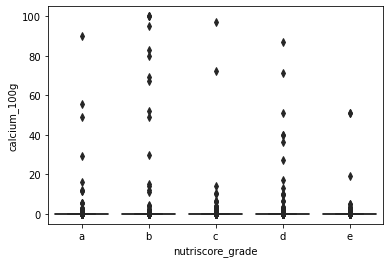

0.0


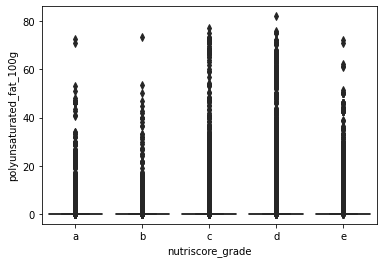

0.0


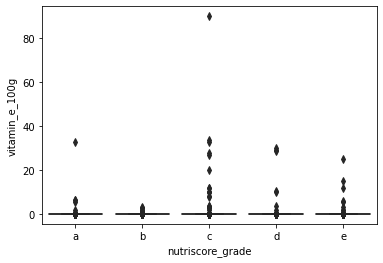

0.0


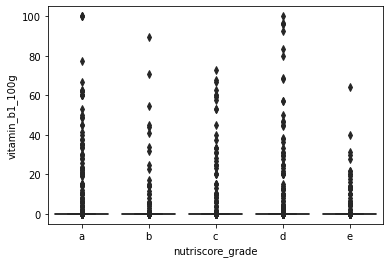

0.0


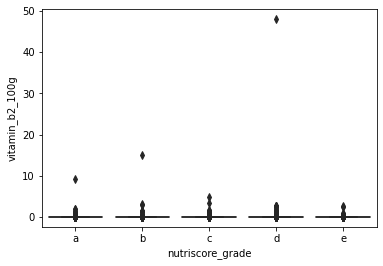

0.0


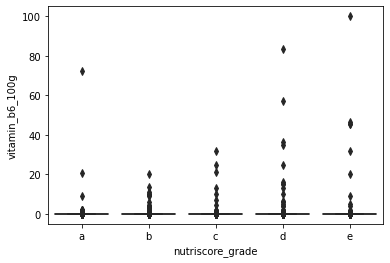

0.0


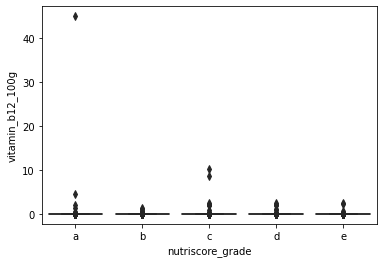

0.0


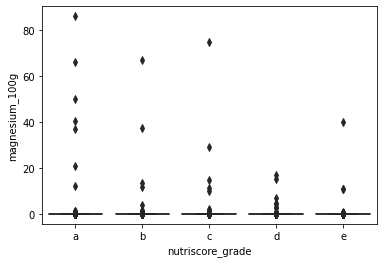

0.0


In [12]:
#liste_nutri2=['energy-kcal_100g', 'energy_100g','fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'sodium_100g', 'fiber_100g']

liste_alpha=['a','b','c','d','e']

list_nutri=['energy-kcal_100g', 'energy_100g','fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'sodium_100g', 'fiber_100g', 
         'vitamin_a_100g', 'vitamin_c_100g','potassium_100g', 'calcium_100g', 'polyunsaturated_fat_100g', 'vitamin_e_100g',
         'vitamin_b1_100g', 'vitamin_b2_100g', 'vitamin_b6_100g', 'vitamin_b12_100g', 
         'magnesium_100g']

for i in list_nutri:
    sns.boxplot(x='nutriscore_grade',y=i,palette=["m", "g"],order=liste_alpha,
            data=df7)

    plt.show()
    print(df7[i].describe()[6]+1.5*(df7[i].describe()[6]-df7[i].describe()[4]))
    
    


## ACP (ANALYSE EN COMPOSANTES PRINCIPALES) 

#### Utiliser moins de vecteurs (illisible)


In [13]:
from sklearn import decomposition
from sklearn import preprocessing

from functions_Copy8 import *

os.path.abspath("functions.py")

'C:\\Users\\ykele\\functions.py'

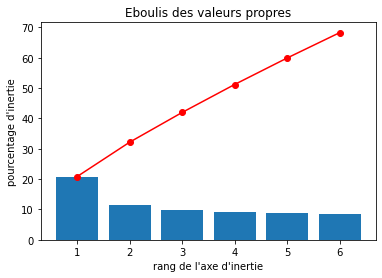

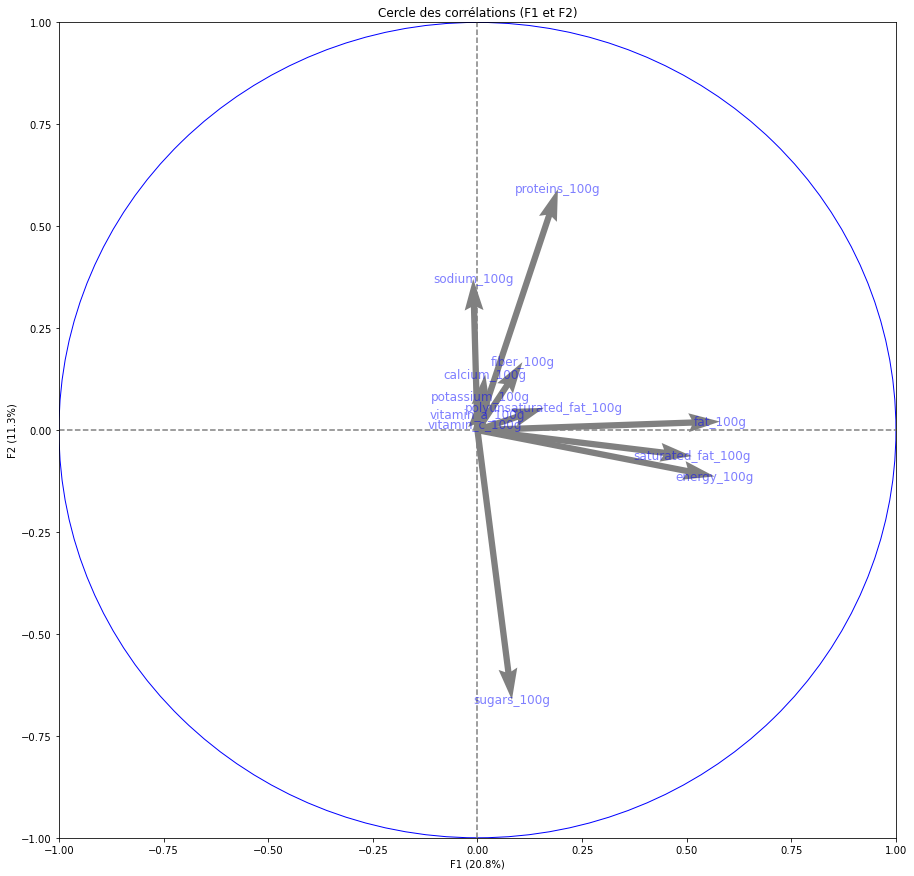

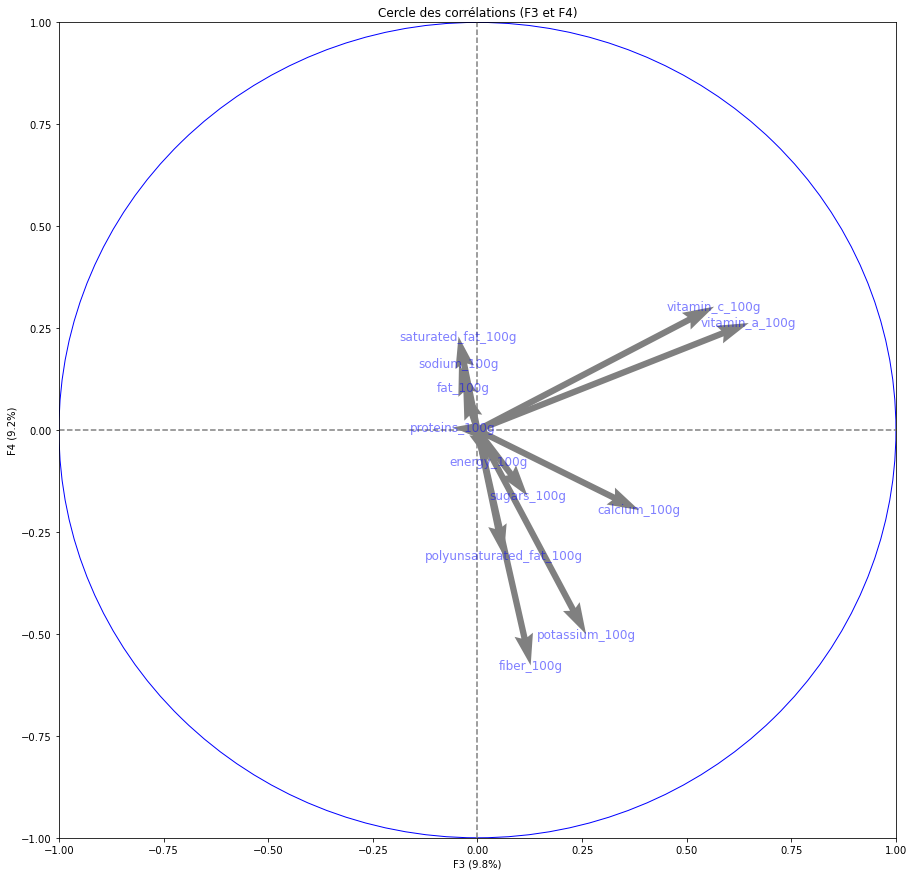

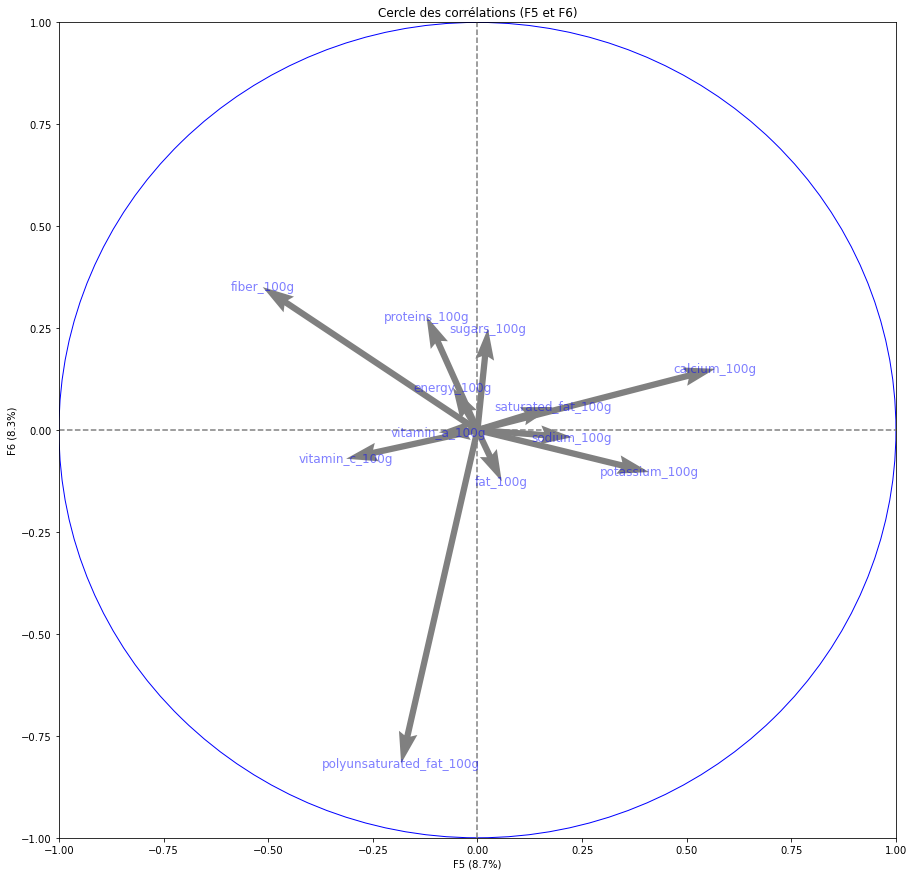

In [14]:
df7_noNa=df7[~df7["nutriscore_score"].isna()]

# choix du nombre de composantes à calculer
n_comp = 6

list_20=['predicted_nutrition_score',
'energy_100g',
'fat_100g', 'polyunsaturated_fat_100g' ,'saturated_fat_100g', 
'sugars_100g', 'proteins_100g', 'sodium_100g', 'fiber_100g', 
          'potassium_100g', 'calcium_100g','vitamin_a_100g', 'vitamin_c_100g'] 

list_21=['energy_100g',
'fat_100g', 'polyunsaturated_fat_100g' ,'saturated_fat_100g', 
'sugars_100g', 'proteins_100g', 'sodium_100g', 'fiber_100g', 
          'potassium_100g', 'calcium_100g','vitamin_a_100g', 'vitamin_c_100g'] 

# selection des colonnes à prendre en compte dans l'ACP
data_pca = df7_noNa[list_21]

# Nutri_score grade :
nutri = [df7_noNa.loc[Id, 'nutriscore_grade'] for Id in data_pca.index]

# préparation des données pour l'ACP
#data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = df7_noNa["product_name"] # ou data.index pour avoir les intitulés
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))


plt.show()


# --------------------------------




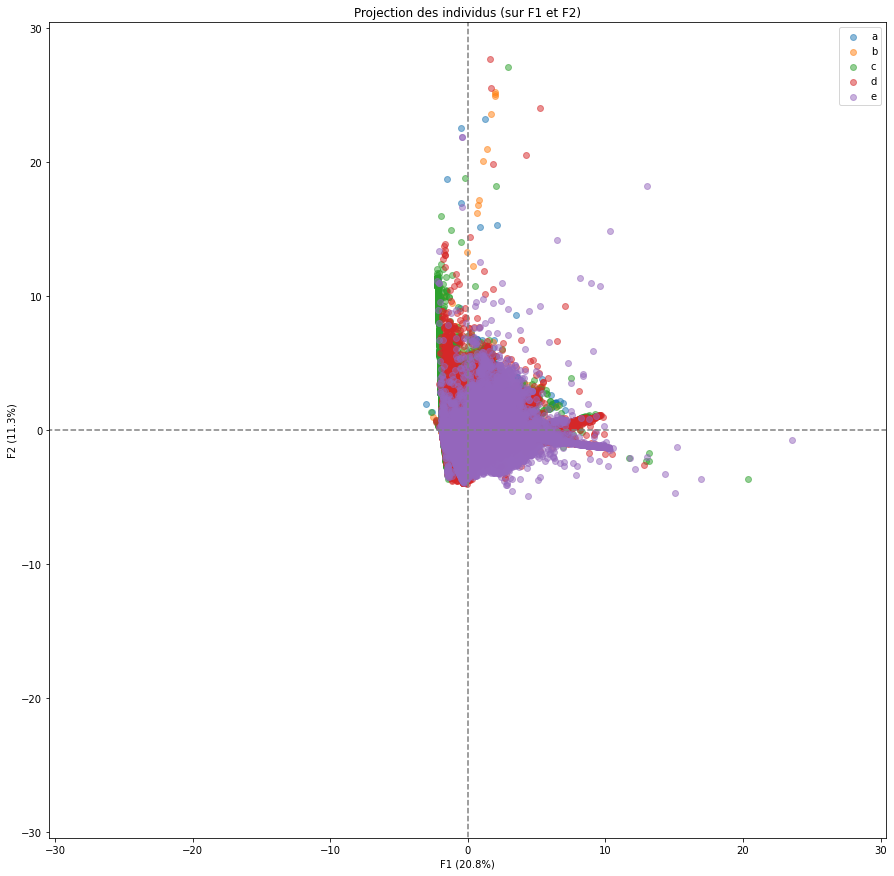

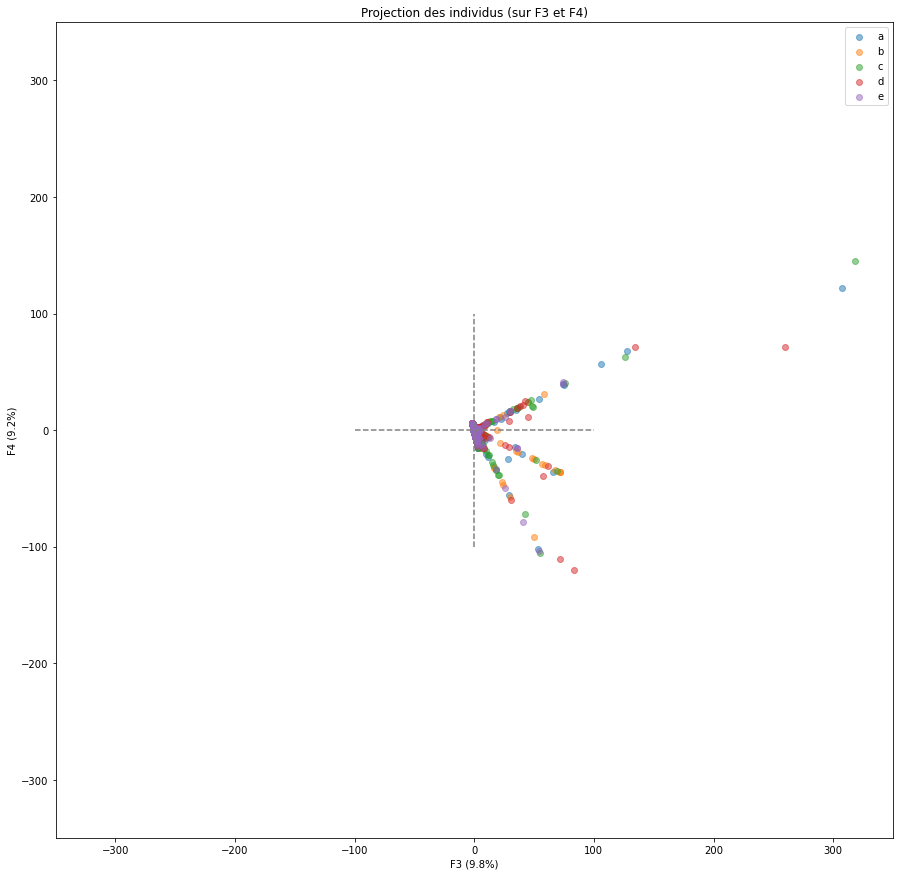

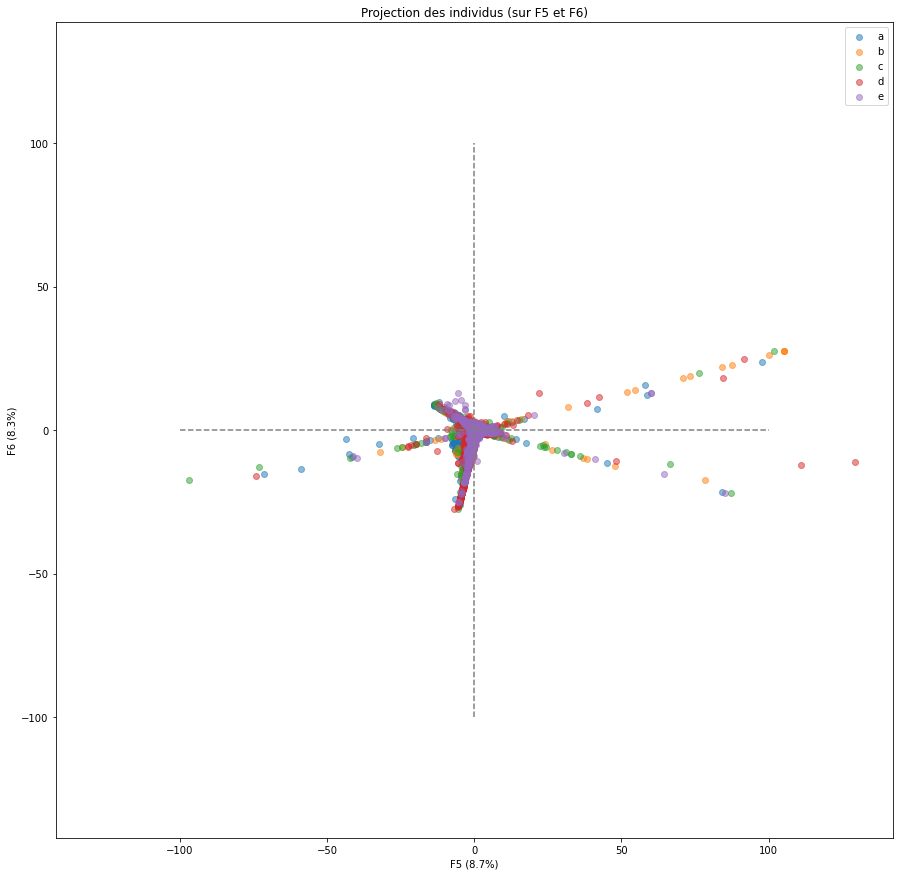

In [15]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], illustrative_var = nutri, alpha = 0.5)

# Calcul du nutrition_score 

## Régression linéaire pour obtenir le nutriscore

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

df7_noNa=df7[~df7["nutriscore_score"].isna()]

In [17]:
mod = sm.regression.linear_model.OLS.from_formula(formula='nutriscore_score ~ energy_100g + fat_100g+saturated_fat_100g+carbohydrates_100g+sugars_100g+sodium_100g+fiber_100g',
                                     data=df7_noNa)

res=mod.fit()


print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       nutriscore_score   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                 1.011e+05
Date:                Tue, 03 Aug 2021   Prob (F-statistic):               0.00
Time:                        12:01:44   Log-Likelihood:            -1.4034e+06
No. Observations:              448107   AIC:                         2.807e+06
Df Residuals:                  448099   BIC:                         2.807e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.1816      0

## KNN 

In [18]:
df7=df6[['Ancien_Index', 'code','product_name','image_nutrition_url', 'brands','product_brand','categories','countries','nutriscore_score', 'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2',
         'energy-kcal_100g', 'energy_100g','fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'sodium_100g', 'fiber_100g', 
         'vitamin_a_100g', 'vitamin_c_100g','potassium_100g', 'calcium_100g', 'polyunsaturated_fat_100g', 'vitamin_e_100g',
         'vitamin_b1_100g', 'vitamin_b2_100g', 'vitamin_b6_100g', 'vitamin_b12_100g', 
         'magnesium_100g']]


#Entraînons le modèle sur les valeurs de nutriscore score =! Nan
df7_noNa=df7[~df7["nutriscore_score"].isna()]


# 0.49 : list_x=['energy-kcal_100g','sugars_100g','saturated_fat_100g','sodium_100g','proteins_100g']

# 'energy_100g','sodium_100g','proteins_100g','carbohydrates_100g','fat_100g'

# 0.45 : échantillon de 1, train à 0.9/test : list_x=['energy_100g','sugars_100g','saturated_fat_100g','sodium_100g','proteins_100g']

# ce que l'on garde pour le nutriscore :

list_20=['energy_100g',
'fat_100g','saturated_fat_100g', 'carbohydrates_100g',
'sugars_100g', 'sodium_100g', 'fiber_100g'] 


list_x=list_20

from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
str_enc=preprocessing.OneHotEncoder(handle_unknown='ignore')

from numpy.random import default_rng


rng = default_rng()
sample=rng.choice(df7_noNa.shape[0],size=int(1*df7_noNa.shape[0]))
sample_data=df7_noNa.iloc[sample]

#sample_dataV2=sample_data.dropna(subset = ['nutriscore_score'], inplace=False)

from sklearn.model_selection import train_test_split

X=sample_data[list_x]
#encoded_X=str_enc.fit_transform(X)
y=sample_data["nutriscore_score"]
encoded_y = lab_enc.fit_transform(y)

#len(X),len(encoded_y)

xtrain,xtest,ytrain,ytest=train_test_split(X,encoded_y,train_size=0.8)

from sklearn import neighbors
knn=neighbors.KNeighborsRegressor(n_neighbors=2)
knn.fit(xtrain,ytrain)    # --> pb, ytrain a des cases Nan. On les supprime de l'échantillon sur la ligne sample_dataV2

#Attention : le nutriscore_score a été converti en int uniquement pour le sample. Le faire pour tout l'ensemble du dataset.
#Nouvelle problématique : les valeurs sont continues. On doit les convertir en entier. Seems to be complticated with NaN. Int64.
#Error : cannot safely cast non-equivalent float64 to int32
#Unknown label type: 'unknown'

score=knn.score(xtest,ytest)
score

# attention modif df6 et df7

0.8913503575756279

score R2 : 0.89


<function matplotlib.pyplot.show(close=None, block=None)>

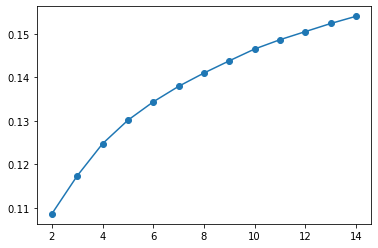

In [19]:
# long à faire tourner :

errors=[]
for k in range(2,15):
    knn=neighbors.KNeighborsRegressor(k)
    errors.append(1-knn.fit(xtrain,ytrain).score(xtest,ytest))
plt.plot(range(2,15),errors,'o-')
plt.show

# on choisira par défaut la valeur k=2 pour knn

In [20]:
# on a pris un sample de 100% du dataframe df6 pour le modèle
# on a entraîné le modèle sur les valeurs où nutriscore était renseigné (df7)
# il faudra ensuite transposer ce modèle sur df6 (où nutriscore n'est pas tout le temps renseigné)
# sur le sample, on prend 90% pour entraîner le modèle, 10% pour le tester
# on obtient xtest et ytest estimés à partir du modèle knn (entrainés sur xtrain, ytrain)
# Plus exactement, on applique le modèle knn à xtest. ça nous donne une valeur. Cette valeur est comparée à ytest. On obtient ainsi le score.

knn = neighbors.KNeighborsClassifier(2)
knn.fit(xtrain, ytrain)

predictions = knn.predict(xtest)
predictions

array([55, 21, 47, ..., 69, 25, 25], dtype=int64)

In [21]:
# penser à appliquer .inverse_transform !

lab_enc.inverse_transform(predictions)

array([14., -3., 10., ..., 21., -1., -1.])

In [22]:
# ne reste plus qu'à appliquer le modèle sur tout le dataframe df7 (où nutriscore n'est pas tout le temps renseigné) ;)

x_pred=(df7[list_x])

prediction = knn.predict(x_pred)

In [23]:
prediction
lab_enc.inverse_transform(prediction)

array([ 6., -1., 14., ..., 22.,  0., 12.])

In [24]:
df6['KNN_predicted_nutrition_score']=lab_enc.inverse_transform(prediction)


In [25]:
df7['nutriscore_score'].describe()

count    448898.000000
mean          8.908726
std           8.900816
min         -15.000000
25%           1.000000
50%           9.000000
75%          16.000000
max          40.000000
Name: nutriscore_score, dtype: float64

In [26]:
df6['KNN_predicted_nutrition_score'].describe()

count    561563.000000
mean          7.950518
std           8.840520
min         -15.000000
25%           0.000000
50%           7.000000
75%          15.000000
max          37.000000
Name: KNN_predicted_nutrition_score, dtype: float64

In [27]:
df7.shape


(561563, 33)

In [28]:
df6["KNN_predicted_nutrition_score"] = df6.KNN_predicted_nutrition_score.astype(float)
#df7["pnns_groups_2"] = df6.pnns_groups_2.astype(str)

#df7.dtypes

df8=df7.reset_index(drop=True)

In [29]:
predicted_nutrition_grade=[]

for i in range(df8.shape[0]):
    if round(df8['KNN_predicted_nutrition_score'][i])<0.0:
        #df8['predicted_nutrition_grade'][i]='a'
        predicted_nutrition_grade.append('a')
    elif round(df8['KNN_predicted_nutrition_score'][i])>=0.0 and round(df8['KNN_predicted_nutrition_score'][i])<=2.0:
        #df8['predicted_nutrition_grade'][i]='b'
        predicted_nutrition_grade.append('b')
    elif round(df8['KNN_predicted_nutrition_score'][i])>=3.0 and round(df8['KNN_predicted_nutrition_score'][i])<=10.0:
        #df8['predicted_nutrition_grade'][i]='c'
        predicted_nutrition_grade.append('c')
    elif round(df8['KNN_predicted_nutrition_score'][i])>=11.0 and round(df8['KNN_predicted_nutrition_score'][i])<=18.0:
        #df8['predicted_nutrition_grade'][i]='d'
        predicted_nutrition_grade.append('d')
    elif round(df8['KNN_predicted_nutrition_score'][i])>=19.0 :
        #df8['predicted_nutrition_grade'][i]='e'
        predicted_nutrition_grade.append('e')
    #else:
     #   predicted_nutrition_grade.append('bizarre')
        

len(predicted_nutrition_grade)
df8['predicted_nutrition_grade']=predicted_nutrition_grade

KeyError: 'KNN_predicted_nutrition_score'

Nutriscore : diff entre aliments positifs et négatifs
limite de l'étude : nous ne ferons pas de distinction entre le liquide et le solide pour le nutriscore_grade

Pour le solide :
inf à -1 : A
0 à 2 : B
3 à 10 : C
11 à 18 : D
Plus de 19 : E

In [ ]:
df8

In [ ]:
df9=df8[['Ancien_Index', 'code','product_name','image_nutrition_url', 'brands','product_brand','categories','countries','nutriscore_score', 'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2',
         'energy-kcal_100g', 'energy_100g','fat_100g', 'saturated_fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'sodium_100g', 'fiber_100g', 
         'vitamin_a_100g', 'vitamin_c_100g','potassium_100g', 'calcium_100g', 'polyunsaturated_fat_100g', 'vitamin_e_100g',
         'vitamin_b1_100g', 'vitamin_b2_100g', 'vitamin_b6_100g', 'vitamin_b12_100g', 
         'magnesium_100g', 'KNN_predicted_nutrition_score','predicted_nutrition_grade']]